### Importing Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "DATA_OMNI_FUKURO.csv"
df = pd.read_csv(file_path, delimiter=";")
df = df.astype(float)

# see the dataset
df.head()

,pixel _x,pixel_y,field_x,field_y
0,278.0,45.0,-200.0,-200.0
1,303.0,46.0,-150.0,-200.0
2,334.0,52.0,-100.0,-200.0
3,369.0,67.0,-50.0,-200.0
4,406.0,85.0,0.0,-200.0


### Insight Visualization

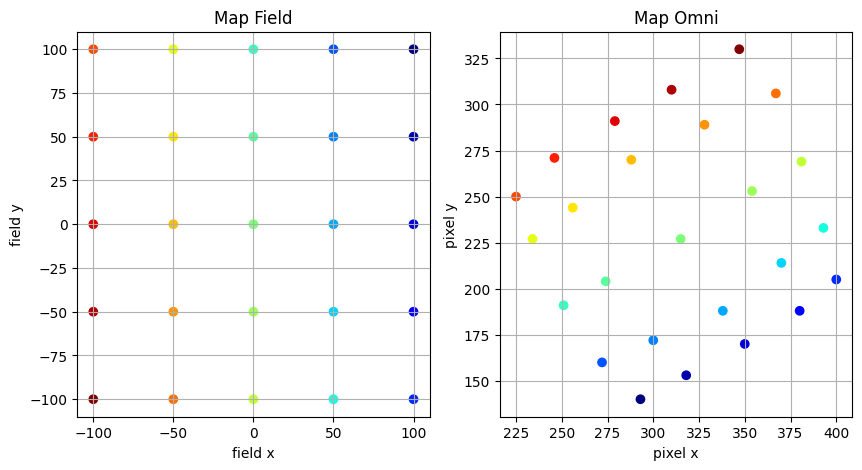

In [77]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plt.figure(figsize=(10,5))
ax1.set_title("Map Field")
ax1.set_xlabel("field x")
ax1.set_ylabel("field y")
ax1.scatter(df['field x'], df['field y'], c=df.index, cmap='jet')#, edgecolors='black')
ax1.grid()

ax2.set_title("Map Omni")
ax2.set_xlabel("pixel x")
ax2.set_ylabel("pixel y")
ax2.scatter(df['pixel x'], df['pixel y'], c=df.index, cmap='jet')#, edgecolors='black')
ax2.grid()

### Model Building

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [79]:
# Use pixel coordinates as input
X_pixel = df[['pixel x', 'pixel y']].values  # Now, input is pixel space
Y_field = df[['field x', 'field y']].values  # Target is field space

# Apply polynomial transformation
poly_transform = PolynomialFeatures(degree=2)
X_pixel_poly = poly_transform.fit_transform(X_pixel)

# Train inverse regression models
regressor_x = LinearRegression().fit(X_pixel_poly, Y_field[:, 0])  # Predict field_x
regressor_y = LinearRegression().fit(X_pixel_poly, Y_field[:, 1])  # Predict field_y

# Predict field coordinates
pred_field_x = regressor_x.predict(X_pixel_poly)
pred_field_y = regressor_y.predict(X_pixel_poly)

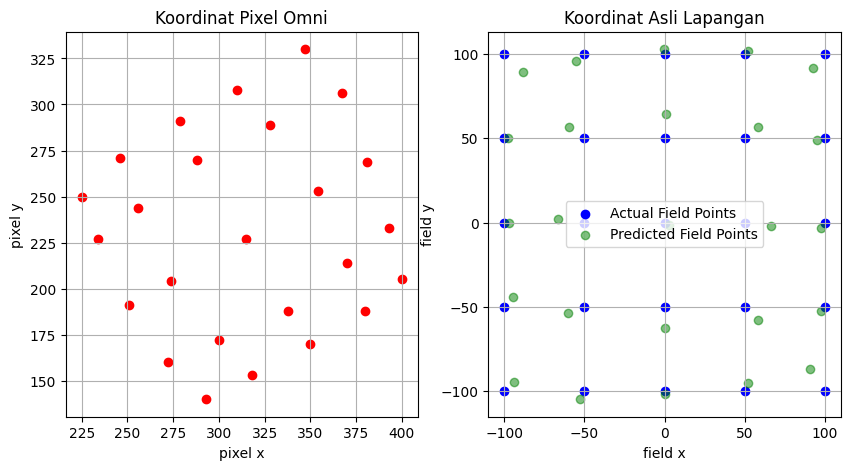

In [94]:
# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['pixel x'], df['pixel y'], c='r', label="Pixel Points")
plt.title("Koordinat Pixel Omni")
plt.xlabel("pixel x")
plt.ylabel("pixel y")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df['field x'], df['field y'], c='b', label="Actual Field Points")
plt.scatter(pred_field_x, pred_field_y, c='green', label="Predicted Field Points", alpha=0.5)
plt.title("Koordinat Asli Lapangan")
plt.xlabel("field x")
plt.ylabel("field y")
plt.legend()
plt.grid()

plt.show()


In [ ]:
feature_names = poly_transform.get_feature_names_out(['pixel_x', 'pixel_y'])

coeff_x = regressor_x.coef_
intercept_x = regressor_x.intercept_

# Extract coefficients for field_y regression
coeff_y = regressor_y.coef_
intercept_y = regressor_y.intercept_

# Construct equation for field_x
equation_x = " + ".join(f"{coeff:.4f} * {feature}" for coeff, feature in zip(coeff_x, feature_names))
equation_x = f"field_x = {equation_x} + {intercept_x:.4f}"

# Construct equation for field_y
equation_y = " + ".join(f"{coeff:.4f} * {feature}" for coeff, feature in zip(coeff_y, feature_names))
equation_y = f"field_y = {equation_y} + {intercept_y:.4f}"

# Print the equations
print("Equation for field_x:")
print(equation_x)
print("\nEquation for field_y:")
print(equation_y)

Equation for field_x:
field_x = 0.0000 * 1 + 0.7803 * pixel_x + -1.2545 * pixel_y + 0.0000 * pixel_x^2 + -0.0003 * pixel_x pixel_y + 0.0003 * pixel_y^2 + 43.9499

Equation for field_y:
field_y = 0.0000 * 1 + -1.5856 * pixel_x + -1.4282 * pixel_y + 0.0003 * pixel_x^2 + 0.0011 * pixel_x pixel_y + 0.0009 * pixel_y^2 + 672.2112


In [ ]:
# sample_test = np.array([306, 188], dtype=float).reshape(-1, 2)
sample_test = np.array([324, 168], dtype=float).reshape(-1, 2)
sample_poly = poly_transform.fit_transform(sample_test)
print(regressor_x.predict(sample_poly), regressor_y.predict(sample_poly))

[80.97607677] [30.02713987]


: 